# EDA and Images Preprocessing

In this section, we focus on the visual data provided by the ODIR-5K dataset. Each patient has fundus photographs for both the left and right eyes, categorized under multiple ocular disease labels. Our objective here is to explore the structure and quality of the image data, verify file integrity, visualize sample cases, and prepare the image paths and formats for the modeling pipeline. 


In [28]:
# Import Librarys
import pandas as pd
import numpy as np
import os 
from PIL import Image  
import random
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision.transforms as transforms


### Load and inspect the Dataset

In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../full_df.csv")

# Basic info about the dataset
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (6392, 19)


,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [17]:
# Check data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

In [18]:
# Count total unique IDs vs total rows
total_rows = df.shape[0]
unique_ids = df['ID'].nunique()

print(f"Total rows: {total_rows}")
print(f"Unique patient IDs: {unique_ids}")


Total rows: 6392
Unique patient IDs: 3358


Note that some patients have only one eye image available (either left or right), as the dataset does not always include both eyes for every individual.

In [27]:
# Explore image sizes 
image_dir = "../ODIR-5K/ODIR-5K/Training Images"

image_sizes = []
corrupted_images = []

for filename in df['filename']:
    path = os.path.join(image_dir, filename)
    try:
        with Image.open(path) as img:
            image_sizes.append(img.size)
    except:
        corrupted_images.append(filename)

print("Different image sizes:")
for size in set(image_sizes):
    print(size)

print("Corrupted images:")
print(corrupted_images)

Different image sizes:
(1895, 1424)
(3696, 2448)
(2584, 2000)
(2196, 1958)
(758, 705)
(929, 788)
(1620, 1444)
(1471, 1473)
(2196, 1960)
(5184, 3456)
(3888, 2592)
(3280, 2480)
(949, 784)
(2057, 1545)
(2304, 2048)
(2736, 1824)
(1677, 1260)
(1380, 1382)
(2592, 1944)
(2124, 2056)
(1725, 1721)
(4288, 2848)
(1467, 1471)
(1476, 1483)
(924, 805)
(2976, 2976)
(2414, 2416)
(2142, 1609)
(2785, 2350)
(1536, 1152)
(2584, 1951)
(2976, 1984)
(1936, 1296)
(947, 800)
(1468, 1472)
(741, 713)
(868, 793)
(1444, 1444)
(2584, 1990)
(925, 799)
(1470, 1472)
(2400, 2400)
(2304, 1728)
(4496, 3000)
(250, 188)
(1468, 1300)
(959, 776)
(1974, 1483)
(320, 316)
(2480, 1919)
(1956, 1934)
(1624, 1232)
(2065, 1850)
(957, 771)
(955, 783)
(2272, 2048)
(2090, 2080)
(2464, 1632)
(930, 790)
(3264, 2448)
(2100, 2100)
(763, 716)
(1920, 894)
(1469, 1470)
(3216, 2136)
(2592, 1728)
(800, 600)
(1920, 1296)
(2992, 2000)
(2048, 1536)
(972, 785)
(1470, 1471)
(727, 716)
(1920, 1088)
(2232, 1677)
(2960, 2935)
(3504, 2336)
(2460, 1904)


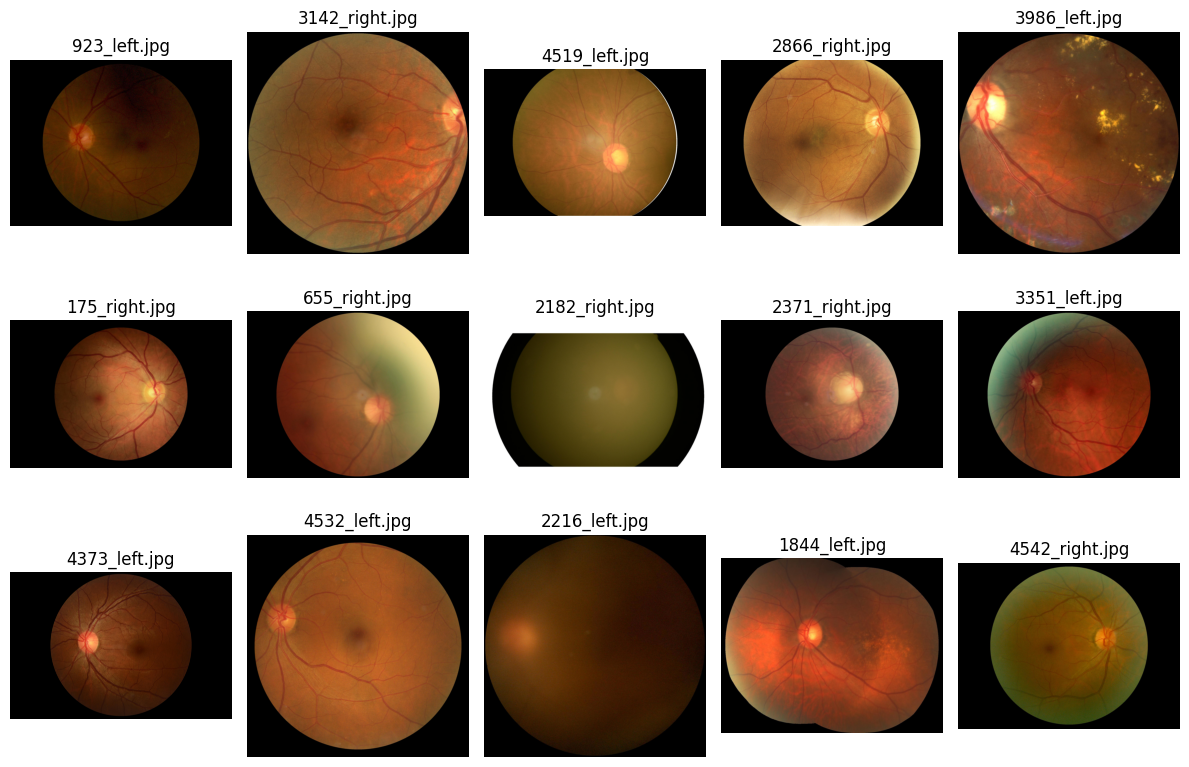

In [33]:
# Show random images
sample = df.sample(15)

# start plotting
plt.figure(figsize=(12, 8))

for i in range(15):
    plt.subplot(3, 5, i + 1)
    path = os.path.join(image_dir, sample.iloc[i]['filename'])
    img = Image.open(path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(sample.iloc[i]['filename'])

plt.tight_layout()
plt.show()
